# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import sys
import os
import warnings
import mosaiks.utils as utl


# set settings
logger = logging.getLogger()
logger.setLevel(logging.INFO)

sys.path += ["../"]
warnings.filterwarnings("ignore")

rasterio_config = utl.load_yaml_config("rasterioc_config.yaml")
os.environ.update(rasterio_config)

/opt/miniconda3/envs/mosaiks/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/opt/miniconda3/envs/mosaiks/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Data

In [3]:
featurization_config = utl.load_yaml_config("featurisation.yaml")

In [4]:
request_points_gdf = utl.load_df_w_latlons_to_gdf(
    dataset_name=featurization_config["coord_set"]["coord_set_name"]
)

# Test speed 
- With or without convex_hull. To test, 
    - change `points_gdf.unary_union` 
    - to `points_gdf.unary_union.convex_hull` 
    - on line 127 of `stacs.py`
- With different coords point sets (closeby or randomly spread)

In [5]:
from mosaiks.fetch.stacs import fetch_stac_items

In [6]:
satellite_search_params = featurization_config["satellite_search_params"]

## Choose coord datasets

In [7]:
n_points = 500

<Axes: >

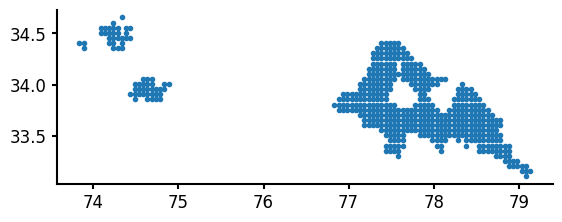

In [8]:
first_points_gdf = request_points_gdf.iloc[:n_points]
first_points_gdf.plot()

<Axes: >

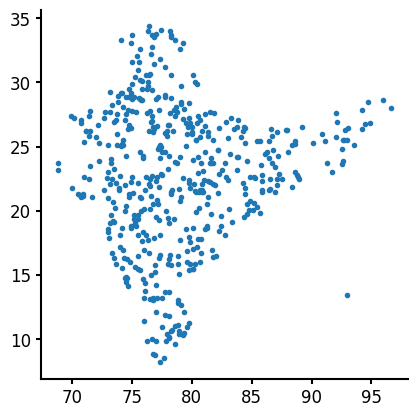

In [9]:
random_points_gdf = request_points_gdf.sample(n_points)
random_points_gdf.plot()

<Axes: >

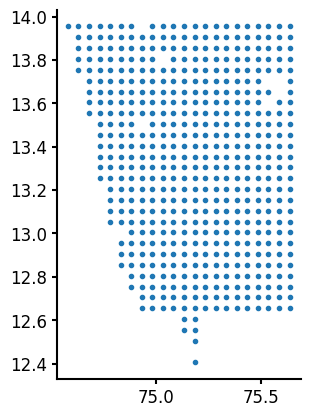

In [10]:
from mosaiks.dask import _sort_by_hilbert_distance
sorted_points_gdf = _sort_by_hilbert_distance(request_points_gdf)
sorted_points_gdf = sorted_points_gdf.iloc[:n_points]
sorted_points_gdf.plot()

## Experiments

Manually vary parameters and compare speeds and results.

In [11]:
%%time
points_gdf_with_stac_1 = fetch_stac_items(
    points_gdf=first_points_gdf,
    satellite_name=satellite_search_params["satellite_name"],
    search_start=satellite_search_params["search_start"],
    search_end=satellite_search_params["search_end"],
    stac_api=satellite_search_params["stac_api"],
    stac_output=satellite_search_params["stac_output"],
)

CPU times: user 1.16 s, sys: 27.7 ms, total: 1.19 s
Wall time: 2.98 s


In [12]:
%%time
points_gdf_with_stac_2 = fetch_stac_items(
    points_gdf=random_points_gdf,
    satellite_name=satellite_search_params["satellite_name"],
    search_start=satellite_search_params["search_start"],
    search_end=satellite_search_params["search_end"],
    stac_api=satellite_search_params["stac_api"],
    stac_output=satellite_search_params["stac_output"],
)

CPU times: user 10.6 s, sys: 338 ms, total: 11 s
Wall time: 15.8 s


In [13]:
%%time
points_gdf_with_stac_2 = fetch_stac_items(
    points_gdf=sorted_points_gdf,
    satellite_name=satellite_search_params["satellite_name"],
    search_start=satellite_search_params["search_start"],
    search_end=satellite_search_params["search_end"],
    stac_api=satellite_search_params["stac_api"],
    stac_output=satellite_search_params["stac_output"],
)

CPU times: user 742 ms, sys: 10.5 ms, total: 753 ms
Wall time: 1.73 s
